In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


In [437]:
df = pd.read_csv("retail_customer_dataset.csv")

In [438]:
df.head(8)

,customer_id,age,annual_income,spending_score,visits_last_month,avg_session_time,purchased
0,1,56,115671.659281,30,1,27.415342,1
1,2,46,4718.970990,71,9,11.538489,0
2,3,32,206193.588249,70,2,15.406546,1
3,4,60,234236.090465,55,11,15.663142,1
4,5,25,38224.053867,67,8,27.575481,1
5,6,38,119416.157717,13,6,16.435515,0
6,7,56,217149.255660,3,6,24.140053,1
7,8,36,303449.728183,26,7,16.032865,1


In [439]:
df.tail(8)

,customer_id,age,annual_income,spending_score,visits_last_month,avg_session_time,purchased
2992,2993,60,59880.905816,90,2,9.531987,0
2993,2994,58,75680.055586,95,7,6.346589,1
2994,2995,56,56234.773298,51,3,4.648441,0
2995,2996,39,83862.258917,32,6,12.217520,1
2996,2997,34,80430.307856,50,5,7.100471,0
2997,2998,51,78378.297093,41,7,19.980342,1
2998,2999,23,50806.864555,66,4,7.473304,0
2999,3000,63,38403.151044,25,9,6.955377,0


In [440]:
df.shape

(3000, 7)

In [441]:
df.columns

Index(['customer_id', 'age', 'annual_income', 'spending_score',
       'visits_last_month', 'avg_session_time', 'purchased'],
      dtype='object')

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        3000 non-null   int64  
 1   age                3000 non-null   int64  
 2   annual_income      2950 non-null   float64
 3   spending_score     3000 non-null   int64  
 4   visits_last_month  3000 non-null   int64  
 5   avg_session_time   2970 non-null   float64
 6   purchased          3000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 164.2 KB


In [443]:
df.describe()

,customer_id,age,annual_income,spending_score,visits_last_month,avg_session_time,purchased
count,3000.000000,3000.000000,2950.000000,3000.000000,3000.000000,2970.000000,3000.000000
mean,1500.500000,41.149000,60086.649554,50.613667,5.018000,10.108399,0.383667
std,866.169729,13.474989,21246.355975,28.574813,2.244702,3.072178,0.486359
min,1.000000,18.000000,-390.243116,1.000000,0.000000,-1.065603,0.000000
25%,750.750000,30.000000,46466.532527,25.000000,3.000000,8.050730,0.000000
50%,1500.500000,41.000000,59968.875645,51.000000,5.000000,10.117941,0.000000
75%,2250.250000,53.000000,73315.947899,76.000000,6.000000,12.273791,1.000000
max,3000.000000,64.000000,303449.728183,99.000000,16.000000,27.575481,1.000000


In [444]:
df.isnull().sum()

customer_id           0
age                   0
annual_income        50
spending_score        0
visits_last_month     0
avg_session_time     30
purchased             0
dtype: int64

In [445]:
df.isnull().sum().sum()

80

In [446]:
df.duplicated().sum()

0

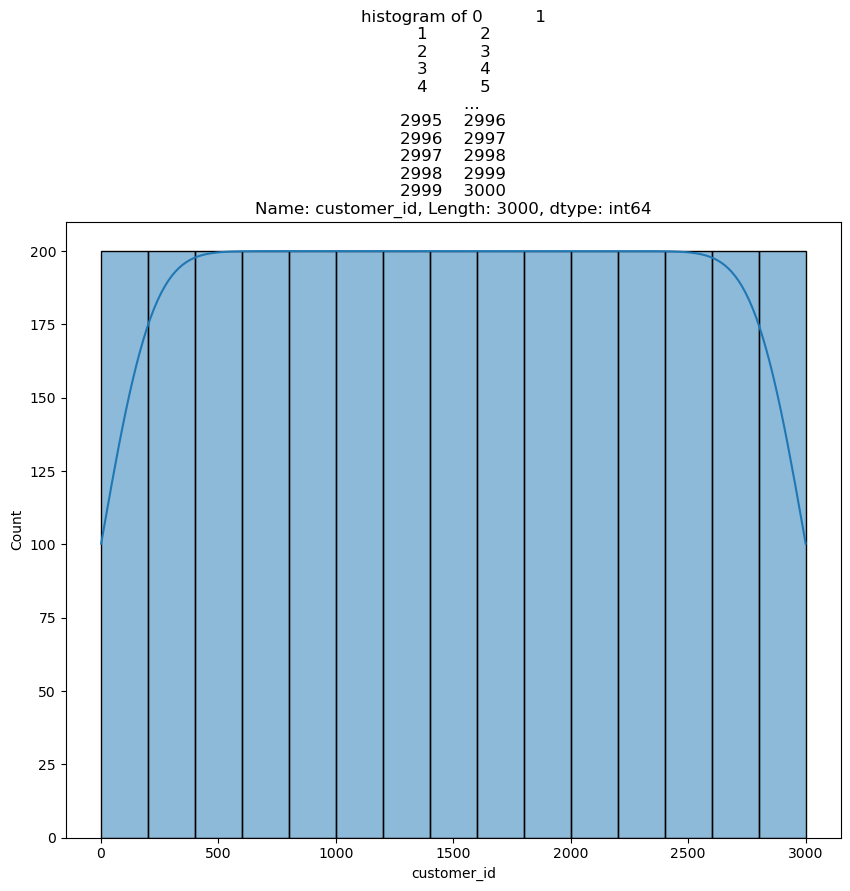

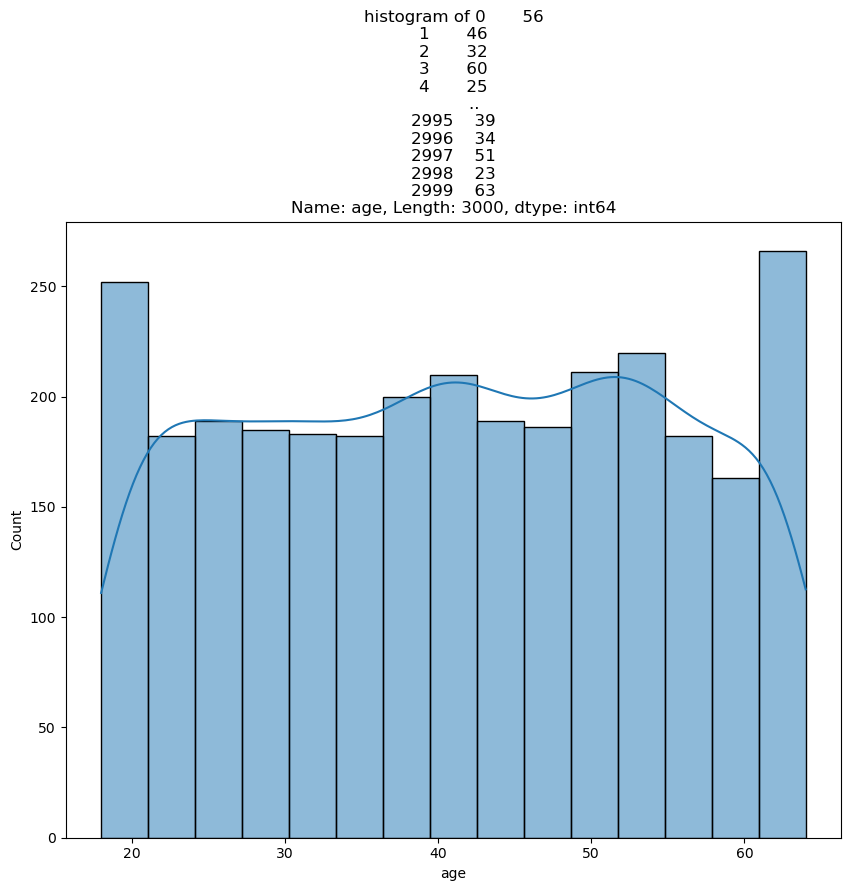

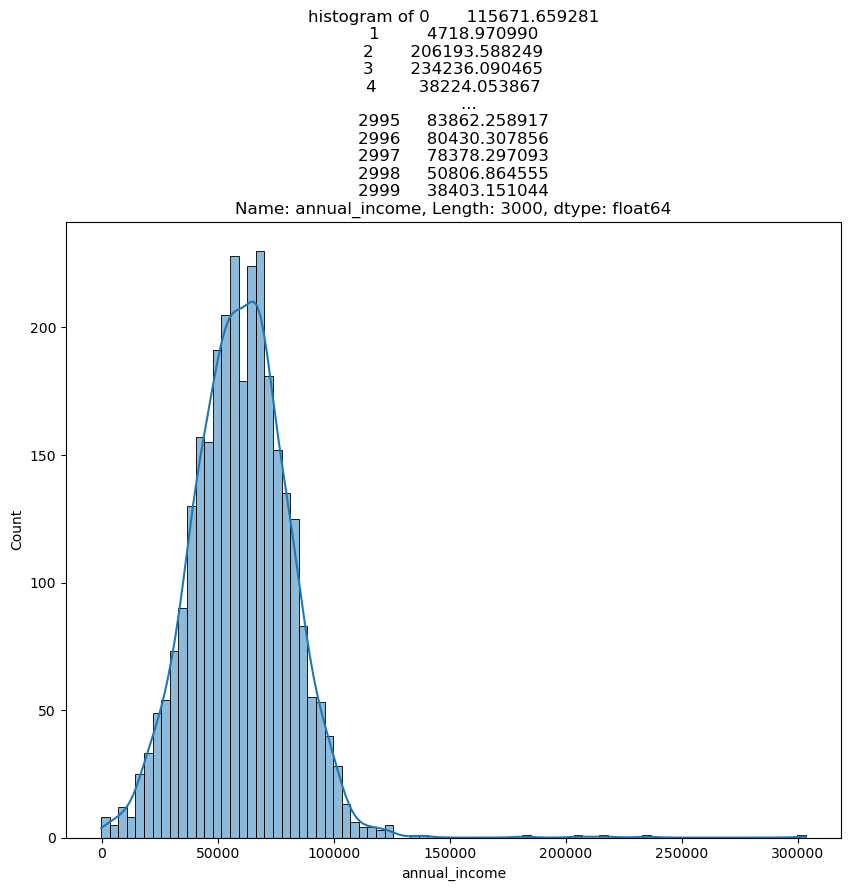

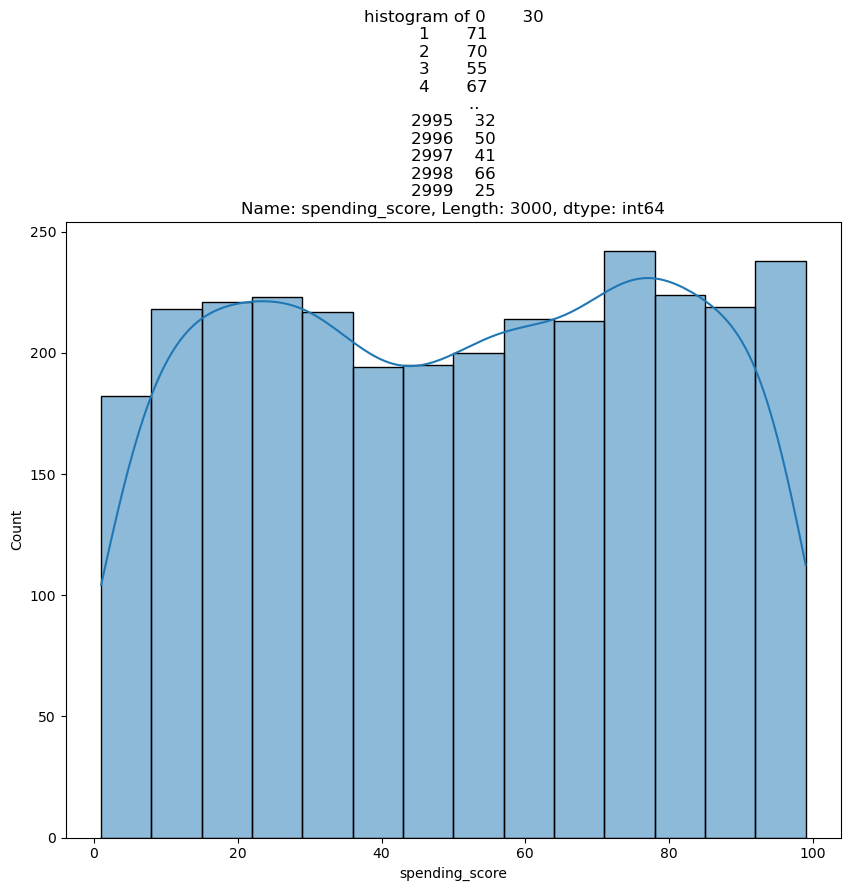

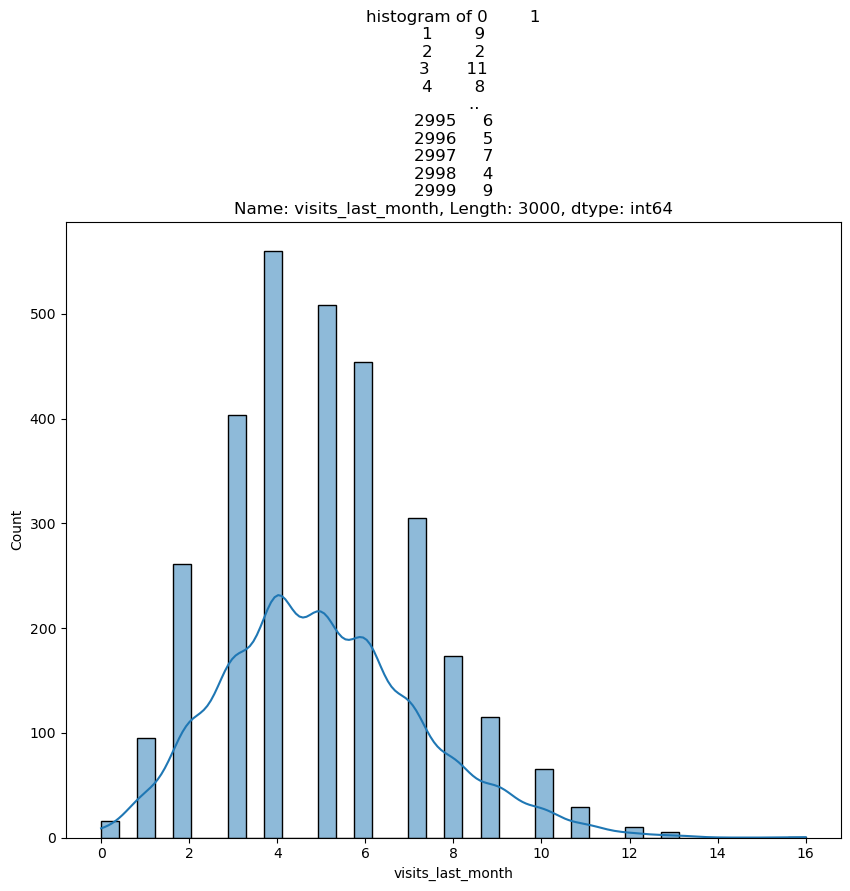

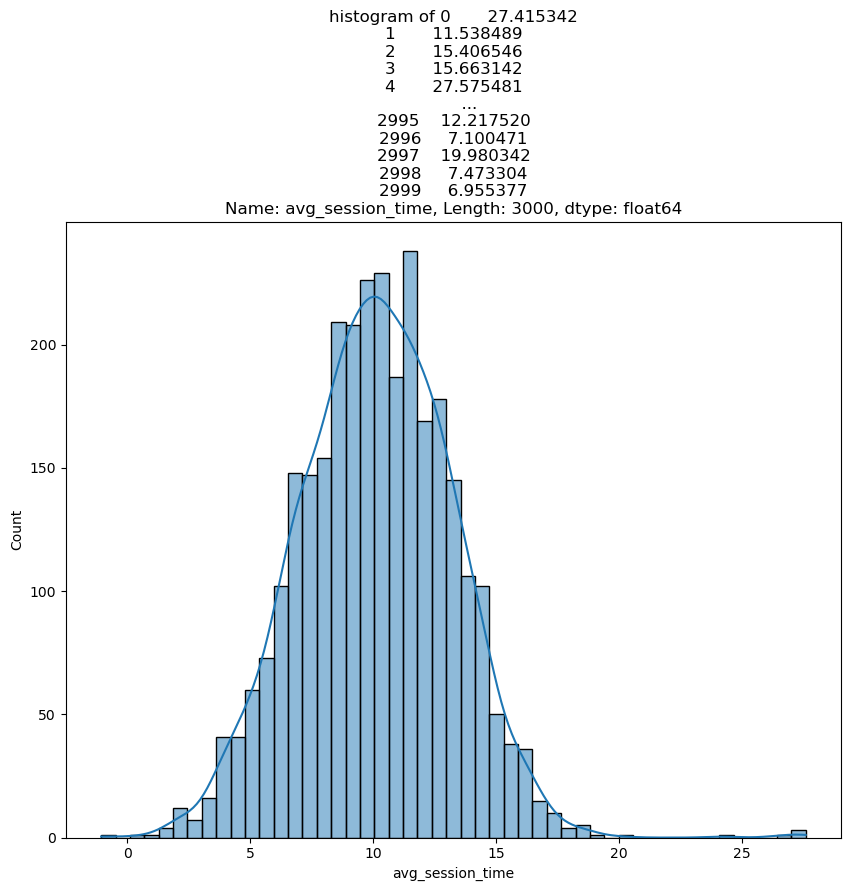

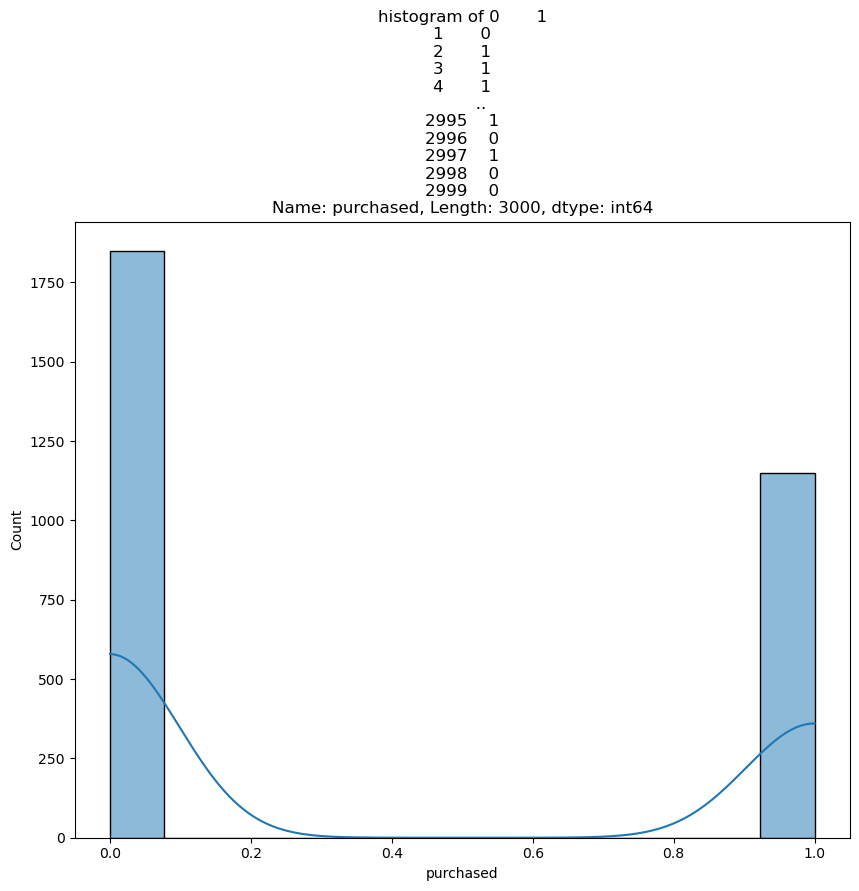

In [447]:
for i in df.columns:
    plt.figure(figsize=(10,8))
    sns.histplot(df[i],kde=True)
    plt.title(f"histogram of {df[i]}")
    plt.show()


In [448]:
df["annual_income"].skew()

0.9763022360875935

In [449]:
df["avg_session_time"].skew()

0.15888763713414092

In [450]:
df["annual_income"].fillna(df["annual_income"].median(), inplace=True)
df["avg_session_time"].fillna(df["avg_session_time"].median(), inplace=True)

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_24632\2951558361.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["annual_income"].fillna(df["annual_income"].median(), inplace=True)
C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_24632\2951558361.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

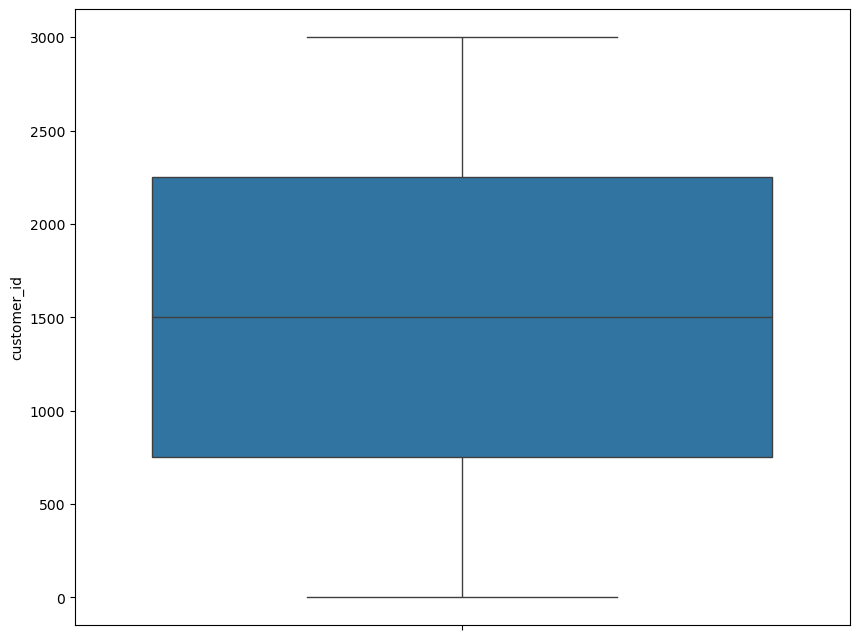

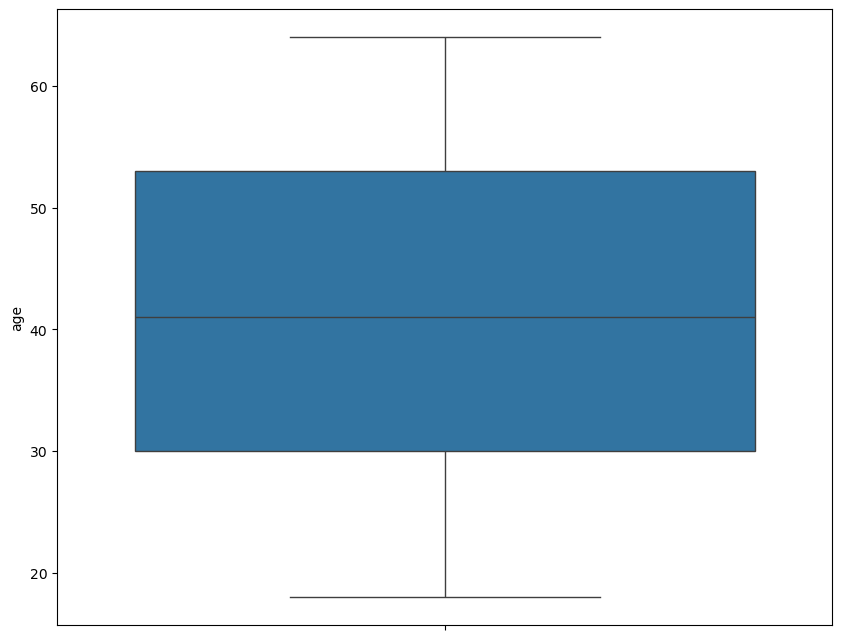

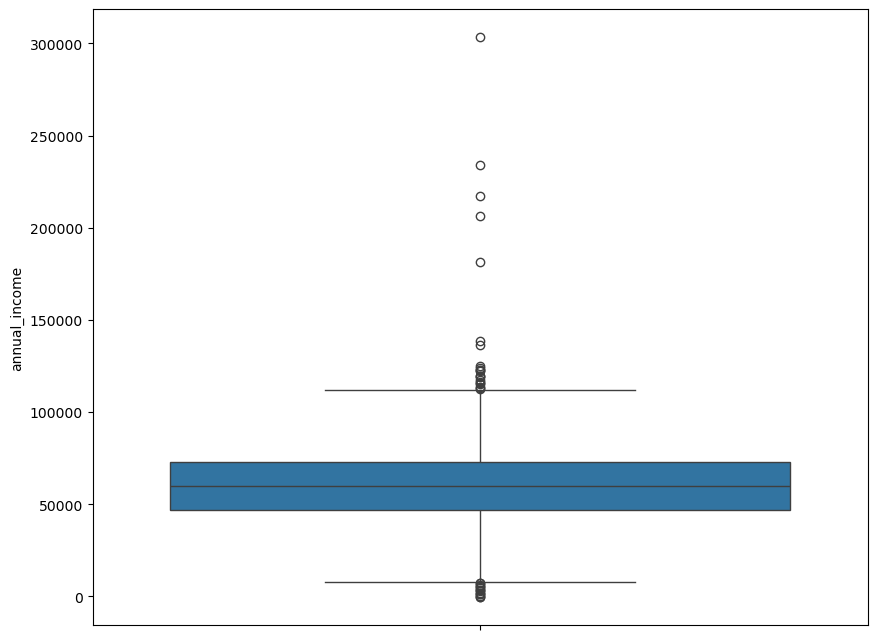

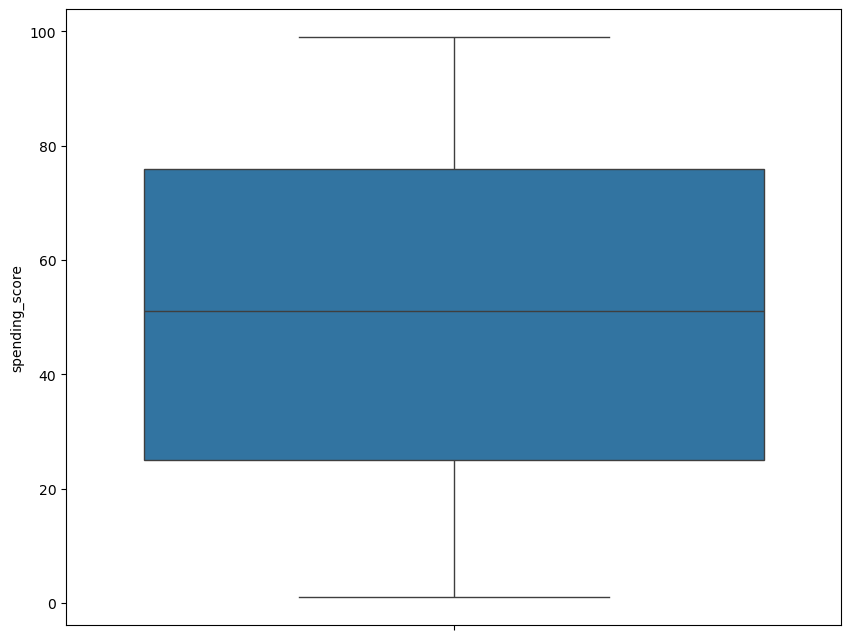

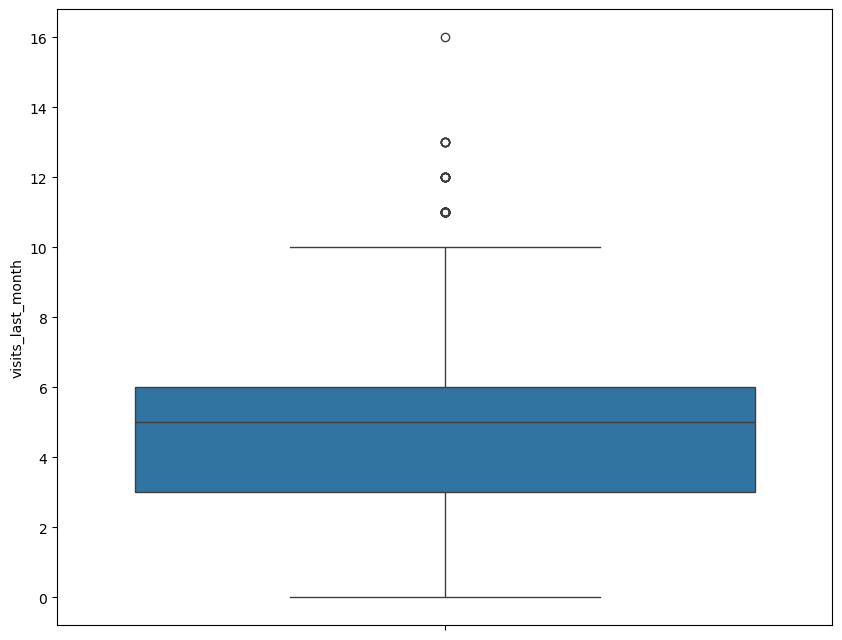

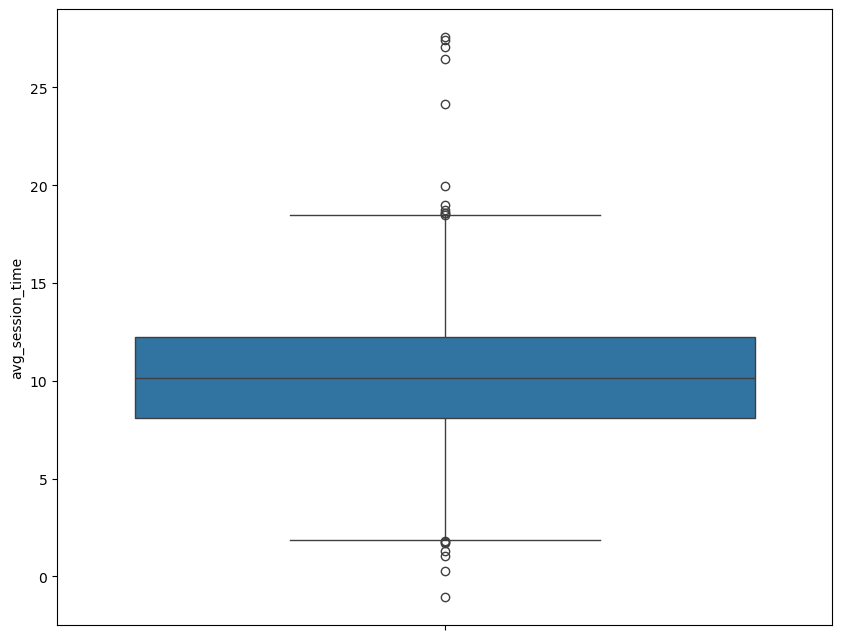

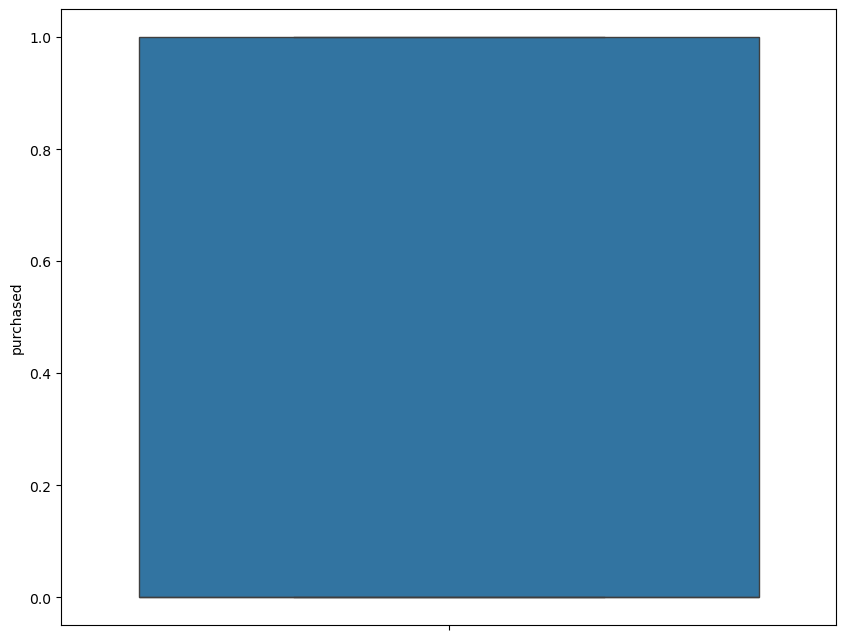

In [451]:
for i in df.columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(df[i])
    plt.show()


In [452]:
def treat_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper, upper,
                   np.where(df[column] < lower, lower, df[column]))

treat_outliers("annual_income")
treat_outliers("avg_session_time")

In [453]:
df["income_per_visit"] = df["annual_income"] / (df["visits_last_month"] + 1)

In [454]:
features = ["age","annual_income","spending_score","visits_last_month","avg_session_time","income_per_visit","purchased"]

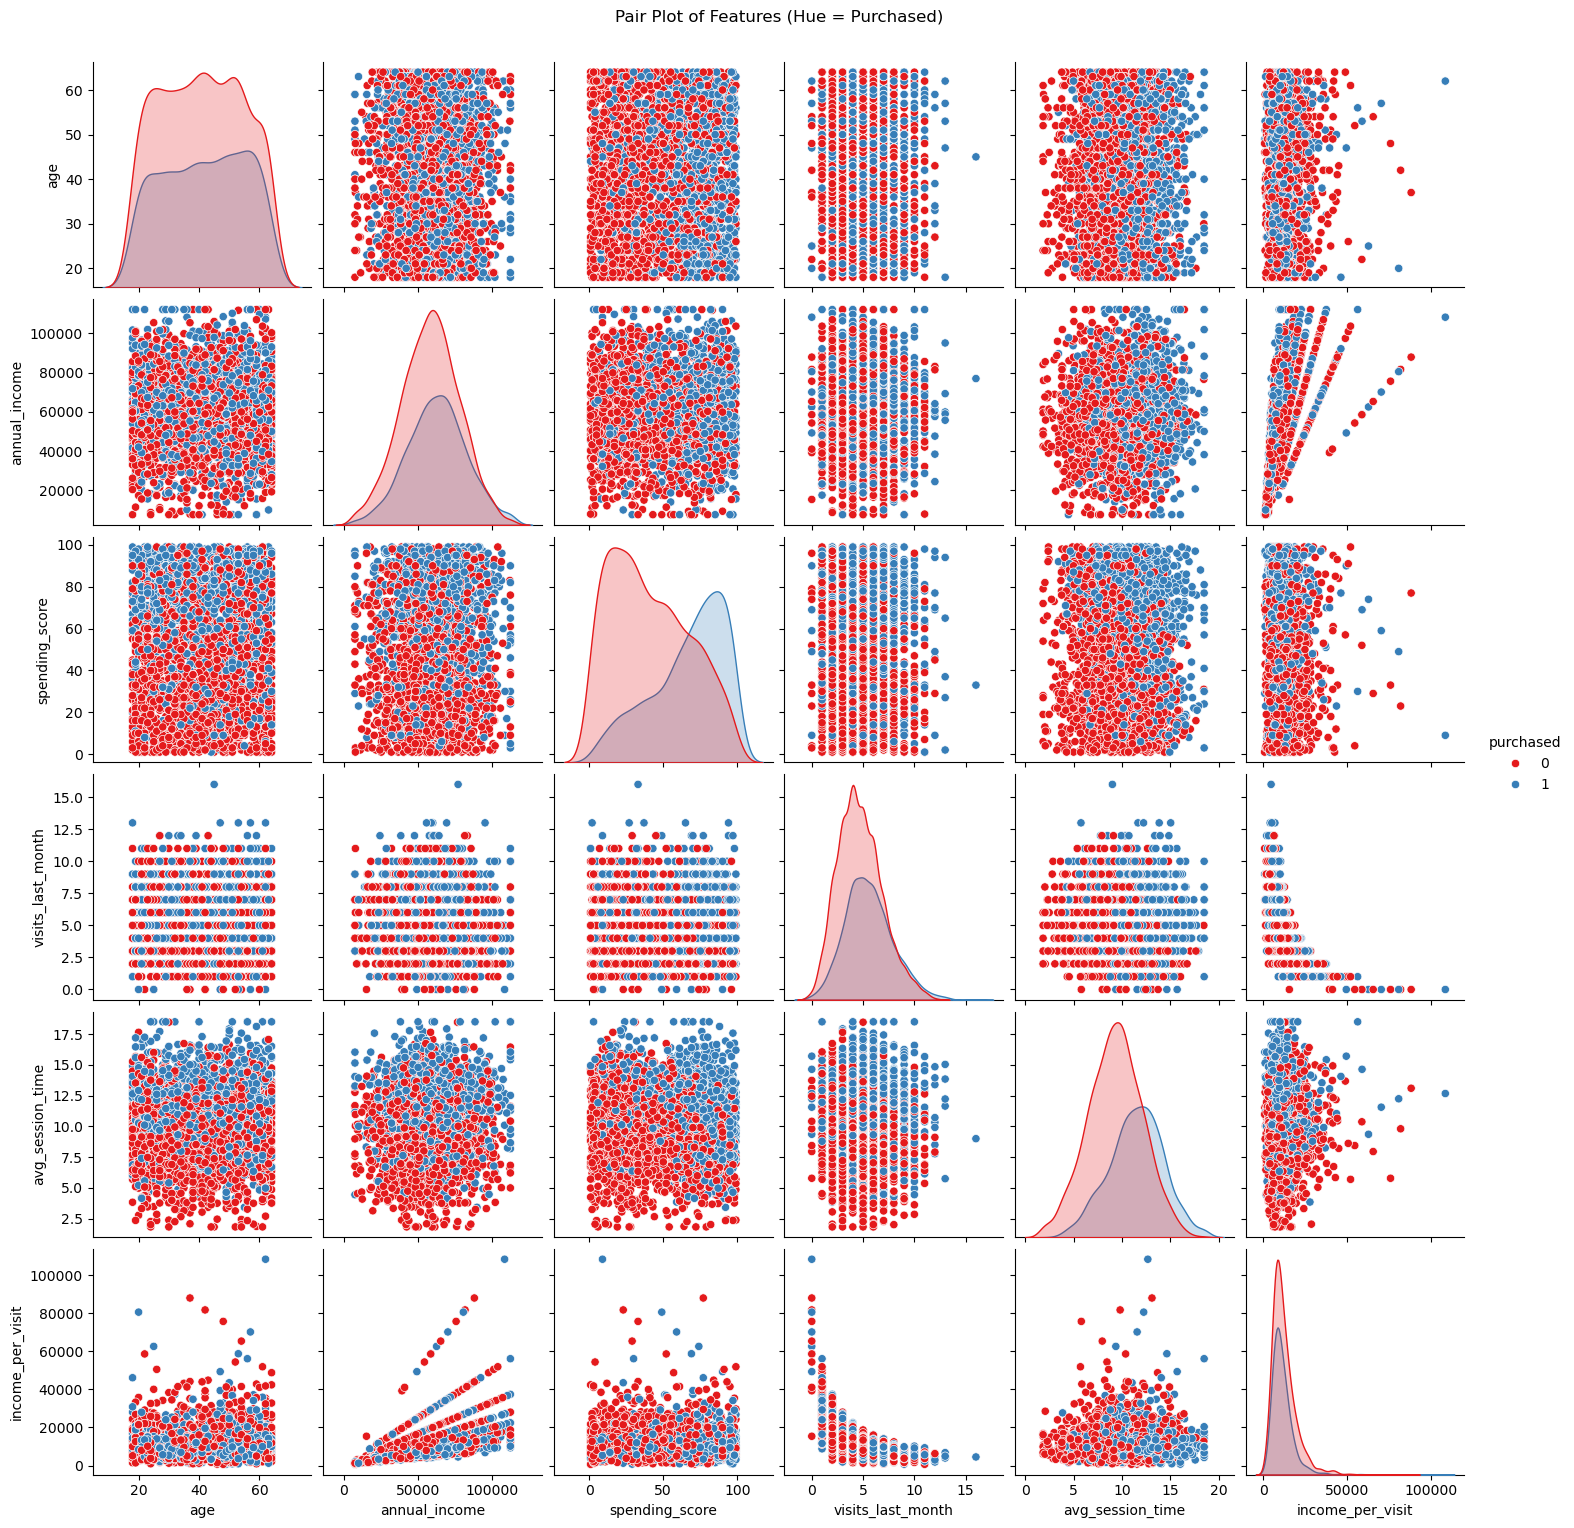

In [455]:
sns.pairplot(
    df[features],
    hue="purchased",
    diag_kind="kde", 
    palette="Set1"     
)

plt.suptitle("Pair Plot of Features (Hue = Purchased)", y=1.02)
plt.show()

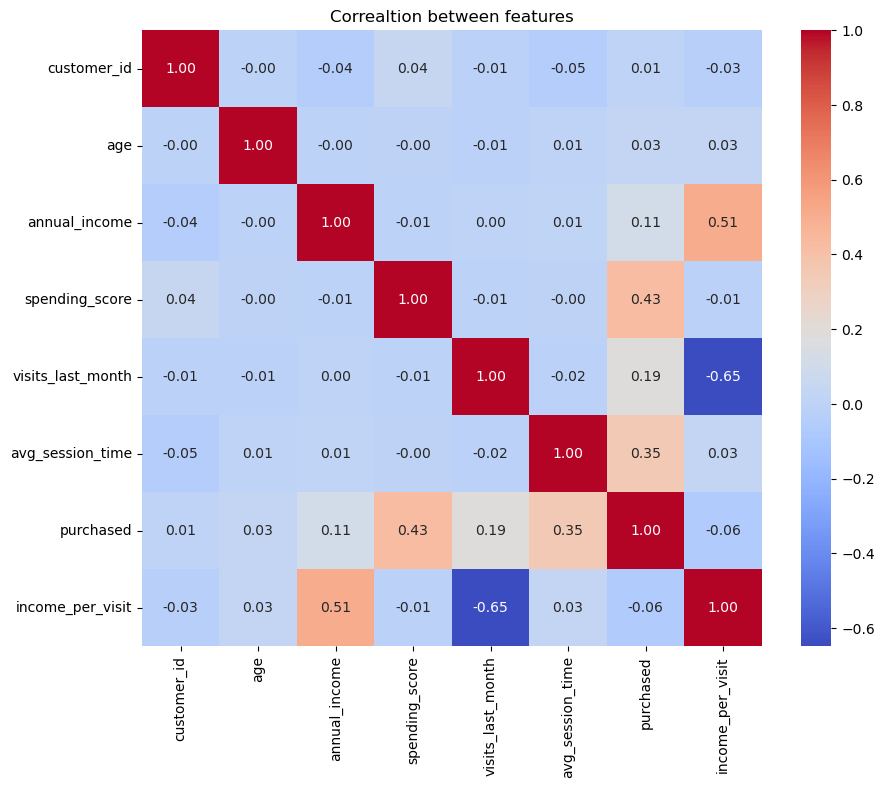

In [456]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correaltion between features")
plt.show()

In [457]:
X = df.drop(["customer_id", "purchased"], axis=1)
y = df["purchased"]

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [459]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [460]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [461]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))


print("\nLogistic Regression Results:")
evaluate(log_model, X_test, y_test)

print("\nRandom Forest Results:")
evaluate(rf_model, X_test, y_test)


Logistic Regression Results:
Accuracy : 0.8
Precision: 0.7532467532467533
Recall   : 0.7341772151898734
F1 Score : 0.7435897435897436

Random Forest Results:
Accuracy : 0.7683333333333333
Precision: 0.7207207207207207
Recall   : 0.6751054852320675
F1 Score : 0.6971677559912854


In [462]:
importances = rf_model.feature_importances_
features = X.columns

In [463]:
feature_importance_df = pd.DataFrame({
"Feature": features,"Importance": importances}).sort_values(by="Importance", ascending=False)

In [464]:
print("\nTop 3 Important Features:")
print(feature_importance_df.head(3))


Top 3 Important Features:
            Feature  Importance
2    spending_score    0.292825
4  avg_session_time    0.250038
1     annual_income    0.143720


In [465]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [466]:
log_scaled = LogisticRegression(max_iter=1000)
log_scaled.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [467]:
print("\nLogistic Regression After Scaling:")
evaluate(log_scaled, X_test_scaled, y_test)


Logistic Regression After Scaling:
Accuracy : 0.8016666666666666
Precision: 0.7565217391304347
Recall   : 0.7341772151898734
F1 Score : 0.7451820128479657


# Model Evaluation Results

## Logistic Regression (Without Scaling)

- **Accuracy:** 0.8000  
- **Precision:** 0.7532  
- **Recall:** 0.7342  
- **F1 Score:** 0.7436  

---

## Logistic Regression (With Standard Scaling)

- **Accuracy:** 0.8017  
- **Precision:** 0.7565  
- **Recall:** 0.7342  
- **F1 Score:** 0.7452  

Slight improvement after scaling.

---

## Random Forest

- **Accuracy:** 0.7683  
- **Precision:** 0.7207  
- **Recall:** 0.6751  
- **F1 Score:** 0.6972  

---

# Model Comparison & Conclusion

Logistic Regression (with scaling) performs better than Random Forest across all evaluation metrics.

- Higher Accuracy  
- Higher Precision  
- Higher Recall  
- Higher F1 Score  

### Bias–Variance Reasoning

- Logistic Regression has higher bias but lower variance.  
- Random Forest has lower bias but higher variance.  

In this dataset, feature relationships appear mostly linear, so Logistic Regression generalizes better.

Random Forest may be slightly overfitting or not benefiting significantly from nonlinear modeling.

---

# Final Conclusion

Logistic Regression (with scaling) is the best model for this dataset.  
It provides better overall performance and stable generalization.


# Business Action Suggestion

From the results, we saw that spending_score, avg_session_time 
and visits_last_month is important for predicting purchase.

So one business action can be that company should focus on customers 
who spend more time on website and visit many times but not purchased yet.

They can give:
- small discount
- reminder emails
- special offer popup

This will increase the chance that customer will buy product.

---

# Bonus

Since Logistic Regression give better result, company can use this model 
to predict if customer will purchase or not.

Based on prediction, they can give personalize offers 
and increase the sales of company.
